## CS/INFO 5304 Assignment 1: Data Preparation <br />


### Case 1: Actual screen time


In [122]:
## Case 1 Problem A code (and optional graph)
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

indi = pd.read_pickle("Extrasensory_individual_data.p")
print(indi['actual_average_screen_time'].describe())
print("As we can see from above, missing value are represented as -1.0")

count    60.000000
mean      3.641333
std       2.109741
min      -1.000000
25%       2.730000
50%       3.675000
75%       4.507500
max      11.630000
Name: actual_average_screen_time, dtype: float64
As we can see from above, missing value are represented as -1.0


#### Writeup Answer to Problem A: 
How are missing values represented for this feature?


(array([ 6., 16., 19., 10.,  3.,  0.,  0.,  0.,  0.,  2.]),
 array([ 1.49 ,  2.504,  3.518,  4.532,  5.546,  6.56 ,  7.574,  8.588,
         9.602, 10.616, 11.63 ]),
 <BarContainer object of 10 artists>)

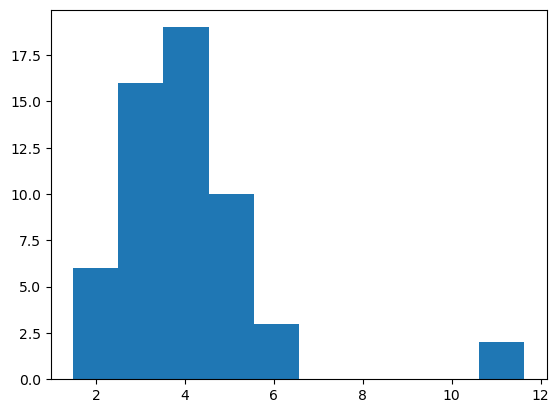

In [25]:
## Case 1 Problem B code and graph
actual_average_screen_time = indi['actual_average_screen_time']
mask = actual_average_screen_time == -1.0
actual_average_screen_time_null_dropped = actual_average_screen_time[~mask]
plt.hist(actual_average_screen_time_null_dropped)

As we can see from the box plot, there are two outliers!


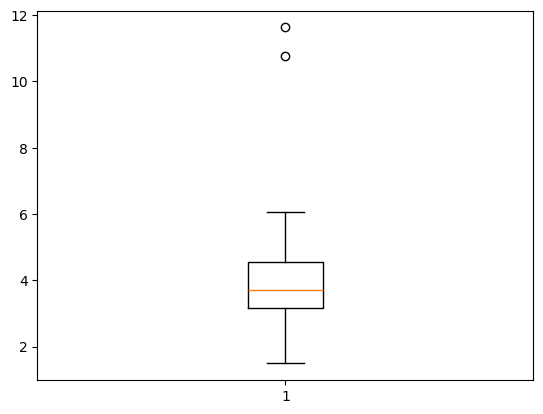

In [55]:
plt.boxplot(actual_average_screen_time_null_dropped)
print("As we can see from the box plot, there are two outliers!")

#### Writeup Answer to Problem B: 
 Does it have outliers?If so, how many?
 Is it skewed? If so, is it left skewed or right skewed? What’s the skewness? 

In [30]:
## Case 1 Problem C code and graph
print(actual_average_screen_time_null_dropped.skew())
print("So the data is left skewed with the skew value as shown above")

2.4639261915800215
So the data is left skewed with the skew value as shown above


#### Writeup Answer to Problem C: 
How did you choose the random value from method 3)? 

A : I chose 90th percentile value. Reason being that the outliers are above the upper whisker of the box plot, so I chose a value greater than the median in order to reduce the skew and make the data more symmetric.

How do the distributions look like after you implement the three filling methods? (Compare them)

A : As we can see from the distribution, that mean and median imputations increases the positive skew whereas random value imputation decreases the skew. Therefore the random distribution made the data more symmetric.


In [145]:
## Case 1 Problem D code and graph
actual_average_screen_time_put_null_for_missing_values = actual_average_screen_time.replace(-1.00, None)
actual_average_screen_time_mean_imputed = actual_average_screen_time_put_null_for_missing_values.fillna(actual_average_screen_time_put_null_for_missing_values.mean()) # Fill missing values with mean

actual_average_screen_time_median_imputed = actual_average_screen_time_put_null_for_missing_values.fillna(actual_average_screen_time_put_null_for_missing_values.median()) # Fill missing values with median

range_low = actual_average_screen_time_put_null_for_missing_values.quantile(0.85)
range_high = actual_average_screen_time_put_null_for_missing_values.quantile(0.95)
random_value = np.random.random() * (range_high - range_low) + range_low
actual_average_screen_time_random_value_imputed = actual_average_screen_time_put_null_for_missing_values.fillna(random_value) # Fill missing values with a random number between 85th percentile and 95th percentile

actual_average_screen_time_original_with_imputations = pd.DataFrame({"original" : actual_average_screen_time_null_dropped, "mean_imputed" : actual_average_screen_time_mean_imputed, "median_imputed" : actual_average_screen_time_median_imputed, "random_value_imputed" : actual_average_screen_time_random_value_imputed}) # Combine original data with imputed dataframes


/var/folders/k3/z0xkry117tv9_jws4xpf88m80000gn/T/ipykernel_36416/4218450433.py:3: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  actual_average_screen_time_mean_imputed = actual_average_screen_time_put_null_for_missing_values.fillna(actual_average_screen_time_put_null_for_missing_values.mean()) # Fill missing values with mean
/var/folders/k3/z0xkry117tv9_jws4xpf88m80000gn/T/ipykernel_36416/4218450433.py:5: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  actual_average_screen_time_median_imputed = actual_average_screen_time_put_null_for_missing_values.fillna

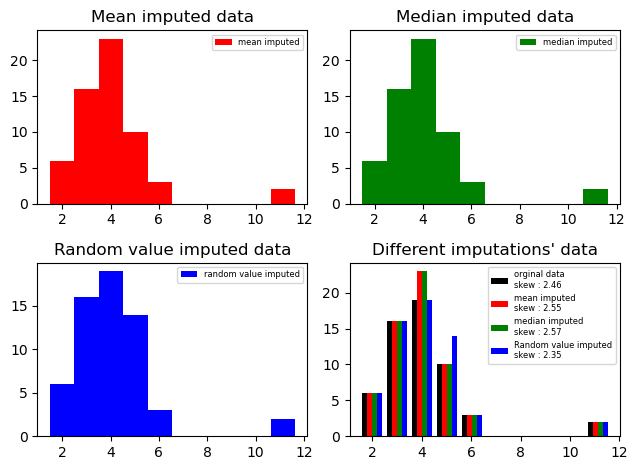

In [146]:
fig, ((ax0, ax1), (ax2, ax3)) = plt.subplots(nrows=2, ncols=2)

colors = ['red']
ax0.hist(actual_average_screen_time_mean_imputed, histtype='bar', color=colors, label=["mean imputed"])
ax0.legend(prop={'size': 6})
ax0.set_title('Mean imputed data')

colors = ['green']
ax1.hist(actual_average_screen_time_median_imputed, histtype='bar', color=colors, label=["median imputed"])
ax1.legend(prop={'size': 6})
ax1.set_title('Median imputed data')

colors = ['blue']
ax2.hist(actual_average_screen_time_random_value_imputed, histtype='bar', color=colors, label=["random value imputed"])
ax2.legend(prop={'size': 6})
ax2.set_title('Random value imputed data')

# ax3.hist(actual_average_screen_time_random_value_imputed, histtype='bar')
# ax3.set_title('different sample sizes')

ax3.hist(actual_average_screen_time_original_with_imputations, histtype='bar', color=["black", "red", "green", "blue"], label=[f"orginal data\nskew : {round(actual_average_screen_time_null_dropped.skew(), 2)}", f"mean imputed\nskew : {round(actual_average_screen_time_mean_imputed.skew(), 2)}", f"median imputed\nskew : {round(actual_average_screen_time_median_imputed.skew(), 2)}", f"Random value imputed\nskew : {round(actual_average_screen_time_random_value_imputed.skew(), 2)}"])
ax3.legend(prop={'size': 6})
ax3.set_title("Different imputations' data")

# Make a multiple-histogram of data-sets with different length.
# x_multi = [np.random.randn(n) for n in [10000, 5000, 2000]]
# ax3.hist(x_multi, n_bins, histtype='bar')
# ax3.set_title('different sample sizes')

fig.tight_layout()
plt.show()

# plt.hist(actual_average_screen_time_imputed, label=["mean inputed", "median imputed", "random value imputed"])


#### Answer to Problem D: 
Report the three p-values. Which one of the filling methods reconstruct this feature to be closest to the research distribution? Why do you think this is the case?

Answer :

p values are given in the output of the next cell.

Method : random value imputation.

Reason : I think that our random value chosen actually reduced the positive skew and make it more symmetric, due to which the resultant distribution turned out to be much closer to the normal distribution.


In [158]:
mean = 3.85
std = 1.25
num_of_samples = 60
normal_dist = np.random.normal(mean, std, num_of_samples)
print(f"t test result for mean imputation : {stats.ttest_ind(actual_average_screen_time_mean_imputed, normal_dist)}\nt test result for median imputation : {stats.ttest_ind(actual_average_screen_time_median_imputed, normal_dist)}\nt test result for random value imputation : {stats.ttest_ind(actual_average_screen_time_random_value_imputed, normal_dist)}")

t test result for mean imputation : TtestResult(statistic=1.604161325391852, pvalue=0.11135175328037088, df=118.0)
t test result for median imputation : TtestResult(statistic=1.5422321083506045, pvalue=0.12569476459482576, df=118.0)
t test result for random value imputation : TtestResult(statistic=1.83671765705443, pvalue=0.06876832633552143, df=118.0)


### Case 2: Perceived average screen time

In [159]:
## Case 2 Problem A code and histogram
perceived_average_screen_time = indi['perceived_average_screen_time']

In [165]:
perceived_average_screen_time.describe() # result shows that missing values are represented by -1.0

count    60.000000
mean      3.145000
std       1.721984
min      -1.000000
25%       2.800000
50%       3.700000
75%       4.200000
max       6.000000
Name: perceived_average_screen_time, dtype: float64

In [166]:
mask = (perceived_average_screen_time == -1.0)
perceived_average_screen_time_null_values_dropped = perceived_average_screen_time[~mask]
perceived_average_screen_time_null_values_dropped.describe() # null values removed as shown by this result

count    53.000000
mean      3.692453
std       0.863768
min       1.100000
25%       3.100000
50%       3.800000
75%       4.200000
max       6.000000
Name: perceived_average_screen_time, dtype: float64

#### Writeup Answer to Problem B: 
 Does it have outliers?If so, how many? 
 Is it skewed? If so, is it left skewed or right skewed? What’s the skewness? 

 Answer : Yes, it has outliers as can be seen by the boxplot below. Number of outliers : 2.

It is negatively skewed(right skewed). skewness is -0.21


{'whiskers': [<matplotlib.lines.Line2D at 0x15b7ee780>,
 'caps': [<matplotlib.lines.Line2D at 0x15b7eecf0>,
 'boxes': [<matplotlib.lines.Line2D at 0x15b7ee4b0>],
 'medians': [<matplotlib.lines.Line2D at 0x15b7ef2c0>],
 'fliers': [<matplotlib.lines.Line2D at 0x15b7ef5c0>],
 'means': []}

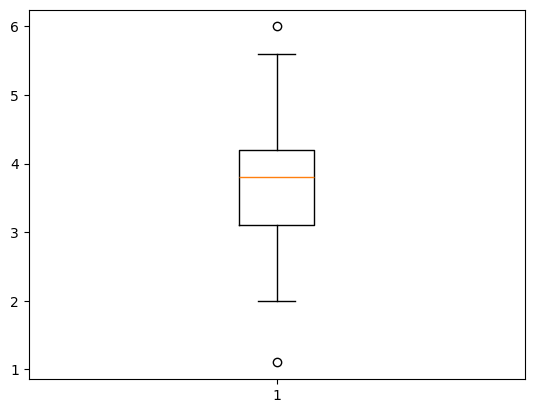

In [174]:
## Case 2 Problem B code
plt.boxplot(perceived_average_screen_time_null_values_dropped)

skew :  -0.21439363473731404


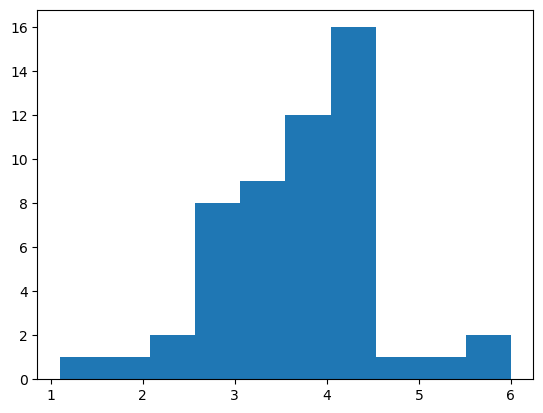

In [175]:
plt.hist(perceived_average_screen_time_null_values_dropped)
print("skew : ", perceived_average_screen_time_null_values_dropped.skew())

How many of them are intense phone users?

Ans : 4, as shown below

In [196]:
## Case 2 Problem C code and graph
mask = (actual_average_screen_time_null_dropped > actual_average_screen_time_null_dropped.mean() + actual_average_screen_time_null_dropped.std())
actual_intense_phone_users = actual_average_screen_time_null_dropped[mask]
print(actual_intense_phone_users.describe())

count     4.000000
mean      8.602500
std       3.025474
min       5.940000
25%       6.030000
50%       8.420000
75%      10.992500
max      11.630000
Name: actual_average_screen_time, dtype: float64


What is the p-value? Do you think they are correlated? What does this mean? Do you think this feature is MAR or MNAR? 

Ans : As the output of the next cell says, our chi square test statistic's value is about 2.46 with p value 0.1167 and dof 1. These conditions are suitable to accept our hypothesis that there is a correlation between actual average screen to be high and student not filling the perceived average screen time.

In [218]:
mask = (actual_average_screen_time_null_dropped > actual_average_screen_time_null_dropped.mean() + actual_average_screen_time_null_dropped.std())
actual_intense_phone_users_binomial = mask
perceived_average_screen_time_binomial = (perceived_average_screen_time == -1.0)
crosstab = pd.crosstab(perceived_average_screen_time_binomial, actual_intense_phone_users_binomial)
print(stats.chi2_contingency(crosstab))

Chi2ContingencyResult(statistic=2.4615384615384617, pvalue=0.11666446478102341, dof=1, expected_freq=array([[45.5,  3.5],
       [ 6.5,  0.5]]))


### Case 3: Location

In [466]:
## Case 3 Problem A code (graph)
sensor = pd.read_pickle("Extrasensory_sensor_data.p")

In [352]:
consistent_users = []
corresponding_minutes_of_data_lost = []
for key in sensor.keys():
    sensor_data = sensor[key]
    low_battery_mask = sensor_data['lf_measurements:battery_level'] < 0.20
    null_latitude_mask = sensor_data['location:raw_latitude'].isnull()
    low_battery_mask_indices = np.where(low_battery_mask == True)[0]
    null_latitude_mask_indices = np.where(null_latitude_mask == True)[0]
    if set(low_battery_mask_indices).issubset(set(null_latitude_mask_indices)) == True and len(low_battery_mask_indices) > 0:
        consistent_users.append(key)
        corresponding_minutes_of_data_lost.append(len(low_battery_mask_indices))
    

In [353]:
print("UUIDs of users who always switched off their location when their battery is < 0.20 and corresponding number of minutes lost due to switching off of the location services : ", [(i, j) for i, j in zip(consistent_users, corresponding_minutes_of_data_lost)])

UUIDs of users who always switched off their location when their battery is < 0.20 and corresponding number of minutes lost due to switching off of the location services :  [('098A72A5-E3E5-4F54-A152-BBDA0DF7B694', 415), ('CDA3BBF7-6631-45E8-85BA-EEB416B32A3C', 74), ('96A358A0-FFF2-4239-B93E-C7425B901B47', 277), ('B09E373F-8A54-44C8-895B-0039390B859F', 369), ('B7F9D634-263E-4A97-87F9-6FFB4DDCB36C', 176)]


explanation of implementation :

- I iterated through the dictionary of sensor data by its keys. Each key represents UUID of a user.
- For each key, I did the following :
- I found out boolean array of when battery was < 0.20 or 20%.
- I found out boolean array of when lattitude info was < null.
- I got the indices of both the boolean arrays
- I checked if the indices of the boolean array when battery was low is a subset of the other boolean array. If yes, then it means that the user always turned off their location when the battery was low. We also check that the list of indices of the boolean array when battery was low if non-empty as such users are not desired.
- For every such user, we store the corresponding key in a list and coresponding number of minutes when their battery was low.

In [476]:
sum(np.isnan(latitude_data) == True) / len(latitude_data)

0.06884377758164166

In [467]:
## Case 3 Problem B code and graph
data_of_interest = sensor['F50235E0-DD67-4F2A-B00B-1F31ADA998B9']
latitude_data = data_of_interest['location:raw_latitude']

# Forward filling
latitude_data_forward_filled = np.copy(latitude_data)
for ind in range(len(latitude_data_forward_filled)):
    if np.isnan(latitude_data_forward_filled[ind]):
        latitude_data_forward_filled[ind] = latitude_data_forward_filled[ind - 1]
assert(max(np.isnan(latitude_data_forward_filled)) == 0)

# backward filling
latitude_data_backward_filled = np.copy(latitude_data)
for ind in range(len(latitude_data_backward_filled) - 1, -1, -1):
    if np.isnan(latitude_data_backward_filled[ind]):
        latitude_data_backward_filled[ind] = latitude_data_forward_filled[ind + 1]
assert(max(np.isnan(latitude_data_backward_filled)) == 0)

# linear interpolation filling
latitude_data_linear_interpolation_filled = np.copy(latitude_data)
latitude_data_linear_interpolation_filled = np.array(pd.Series(latitude_data_linear_interpolation_filled).interpolate(mode='linear'))
assert(max(np.isnan(latitude_data_linear_interpolation_filled)) == 0)

In [468]:
len(latitude_data_linear_interpolation_filled), len(latitude_data_backward_filled), len(latitude_data_forward_filled), len(latitude_data)

(2266, 2266, 2266, 2266)

Compare the 4 traces. What do you see? If you were to use this dataset for further analysis, which filling method will you choose? 

Ans : On plotting all the 4 traces, it seems that it doesn't make much difference in what method is to be used as graphs are more or less overlapping on each other. By seeing the graphs, we can see that there is an abrupt increase in the latitude value after 1000 mark which falls back to its original position at around 1400 marks. Similarly, latitude aabruptly decreases at around 1600 mark and then goes back to normal position after few marks.

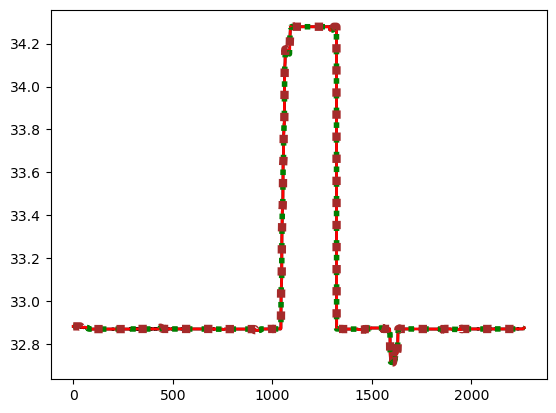

In [497]:
# multiple line plots
plt.plot(latitude_data, marker='', color='black', linestyle = '-', linewidth = 2)
plt.plot(latitude_data_forward_filled, marker='', color='red', linestyle = '-', linewidth=2)
plt.plot(latitude_data_backward_filled, marker='', color='green', linewidth=4, linestyle='dotted', label="toto")
plt.plot(latitude_data_linear_interpolation_filled, marker='', color='brown', linewidth=6, linestyle='dotted', label="toto")

# show legend
# plt.legend()

# show graph
plt.show()